# Задачи

1. Загрузите датасет transaction_data.csv. Проверьте размер таблицы, типы переменных, число пропущенных значений и описательную статистику.
2. Какие значения находятся в колонке transaction? Сколько наблюдений относятся к тому или иному уровню? Визуализируйте результат с помощью барплота. Подумайте, как можно улучшить график.
3. Сколько транзакций завершились ошибкой?
4. Сколько успешных транзакций осуществил каждый из пользователей? Постройте гистограмму распределения числа успешных транзакций.
5. Коллега прислал Вам обновленные данные. Постройте сводную таблицу user_vs_minute_pivot, где в качестве столбцов будут использованы имена пользователей, строк – минуты, значений – число совершенных операций в указанную минуту. Пропущенные значения заполните нулями.
6. Изучите представленный график. Помогите коллеге разобраться,  есть ли в данных ошибка, или же всё хорошо.
7. Если в данные закралась ошибка, исправьте её и сохраните правильное число минут, прошедших с начала дня, в колонку true_minute.


# Описание данных
Имеются следующие данные:

- date – дата (2020-03-02 00:00:00 – 2020-03-02 01:29:05)
- name – имя пользователя
- transaction – статус транзакции
- minute* – сколько минут прошло с начала дня

In [3]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

In [4]:
# таблица с уникальными идентификаторами пользователей
df = pd.read_csv('./transaction_data.csv')

In [5]:
df.head()

,date,name,transaction
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled
1,2020-03-02 00:59:09,Irina_Fedorova,successfull
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled


In [6]:
df.shape


(5315, 3)

In [7]:
df.info() #пропусков не обнаружено

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5315 entries, 0 to 5314
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         5315 non-null   object
 1   name         5315 non-null   object
 2   transaction  5315 non-null   object
dtypes: object(3)
memory usage: 124.7+ KB


In [8]:
df.describe(include='all') #посмотреть описательную статистику

,date,name,transaction
count,5315,5315,5315
unique,3373,56,3
top,2020-03-02 00:33:10,Masha_Ozerova,successfull
freq,6,112,3692


# Задание 2

Проверьте, какие значения принимает колонка transaction . Сколько наблюдений относятся к тому или иному уровню? Визуализируйте результат с помощью барплота.

In [9]:
df.transaction.unique()

array(['cancelled', 'successfull', 'error'], dtype=object)

In [10]:
trans_count = df.transaction.value_counts()
trans_count #transaction - категориальная переменная

successfull    3692
cancelled      1619
error             4
Name: transaction, dtype: int64

[Text(0, 0, '3692'), Text(0, 0, '1619'), Text(0, 0, '4')]

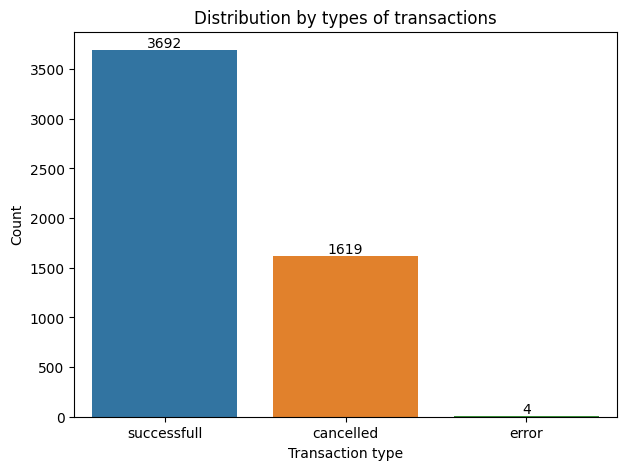

In [11]:
fig, ax = plt.subplots(figsize=(7, 5))
sns.barplot(x=trans_count.index, y=trans_count.values, ax=ax)
ax.set_ylabel('Count')
ax.set_xlabel('Transaction type')
ax.set_title('Distribution by types of transactions')
ax.bar_label(ax.containers[0])

In [12]:
trans_ratio = df.transaction.value_counts(normalize=True)
trans_ratio

successfull    0.694638
cancelled      0.304610
error          0.000753
Name: transaction, dtype: float64

# Задание 3
Сколько транзакций завершились ошибкой?

In [13]:
a = trans_count['error']
print(f'{a} транзакции было завершено с ошибкой')

4 транзакции было завершено с ошибкой


# Задание 4
Сколько транзакций осуществил каждый из пользователей? Осуществлёнными считаются транзакции со значением successfull

Посмотрите на характеристики распределения, а затем постройте гистограмму числа успешных транзакций, совершённых каждым пользователем, где

- по оси x – число транзакций
- по оси y – доля пользователей с таким числом транзакций

In [14]:
#фильтрация данных по типу транзакций
successfull_df = df.loc[df.transaction == 'successfull'].groupby('name', as_index=False).agg({'transaction': 'count'})
#или
#successfull_df = df.loc[df.transaction == 'successfull'].groupby('name', as_index=False).size()

In [15]:
successfull_df.head()

,name,transaction
0,Ekaterina_Fedorova,72
1,Ekaterina_Ivanova,59
2,Ekaterina_Lesnova,63
3,Ekaterina_Ozerova,72
4,Ekaterina_Petrova,68


In [16]:
successfull_df.describe()

,transaction
count,56.000000
mean,65.928571
std,7.787769
min,46.000000
25%,61.000000
50%,64.000000
75%,72.000000
max,82.000000


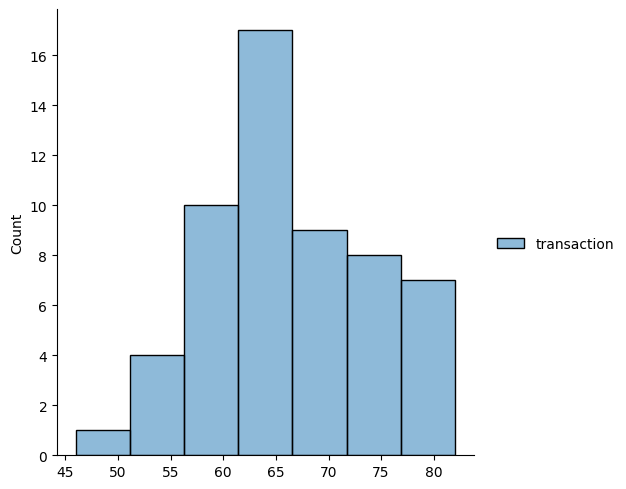

In [17]:
sns.displot(successfull_df, kde=False)

# Задание 5
К вам пришёл коллега с немного обновленными данными. Постройте сводную таблицу user_vs_minute_pivot, где:

- столбцы – имена пользователей
- строки – минута времени осуществления операции (minute)
- значения – число совершённых операций
Пропущенные значения заполните нулями.

Note: фильтровать успешные транзакции не нужно - постройте табличку по всем.

Новые данные сохранены в df.

In [18]:
df_1 = pd.read_csv('transaction_data_updated.csv', parse_dates=['date'])

FileNotFoundError: [Errno 2] No such file or directory: 'transaction_data_updated.csv'

In [ ]:
df_1.head()

,date,name,transaction,minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17


In [ ]:
df_1.dtypes

date           datetime64[ns]
name                   object
transaction            object
minute                  int64
dtype: object

In [ ]:
tans_per_min = df_1.groupby(['name', 'minute'], as_index=False).size()
#метод size() посчитает кол-во строк в сочетании name, minute

In [ ]:
tans_per_min.head()

,name,minute,size
0,Ekaterina_Fedorova,0,3
1,Ekaterina_Fedorova,1,4
2,Ekaterina_Fedorova,2,1
3,Ekaterina_Fedorova,3,3
4,Ekaterina_Fedorova,4,3


In [ ]:
user_vs_minute_pivot = tans_per_min.pivot(index='minute', columns='name', values='size')
user_vs_minute_pivot.head()

name,Ekaterina_Fedorova,Ekaterina_Ivanova,Ekaterina_Lesnova,Ekaterina_Ozerova,Ekaterina_Petrova,Ekaterina_Polyanova,Ekaterina_Smirnova,Irina_Fedorova,Irina_Ivanova,Irina_Lesnova,...,Svetlana_Petrova,Svetlana_Polyanova,Svetlana_Smirnova,Vasilisa_Fedorova,Vasilisa_Ivanova,Vasilisa_Lesnova,Vasilisa_Ozerova,Vasilisa_Petrova,Vasilisa_Polyanova,Vasilisa_Smirnova
minute,,,,,,,,,,,,,,,,,,,,,
0,3.0,4.0,2.0,3.0,4.0,4.0,2.0,1.0,2.0,2.0,...,NaN,3.0,1.0,1.0,4.0,1.0,3.0,NaN,NaN,1.0
1,4.0,4.0,NaN,4.0,2.0,5.0,4.0,4.0,4.0,3.0,...,4.0,5.0,3.0,2.0,3.0,3.0,NaN,NaN,3.0,2.0
2,1.0,2.0,4.0,4.0,2.0,1.0,3.0,2.0,3.0,3.0,...,4.0,1.0,3.0,3.0,NaN,1.0,2.0,1.0,3.0,1.0
3,3.0,NaN,2.0,NaN,5.0,2.0,1.0,3.0,2.0,2.0,...,1.0,5.0,5.0,2.0,4.0,NaN,3.0,4.0,1.0,NaN
4,3.0,NaN,NaN,3.0,1.0,1.0,2.0,3.0,2.0,1.0,...,1.0,2.0,2.0,1.0,1.0,2.0,2.0,3.0,NaN,1.0


In [ ]:
user_vs_minute_pivot = user_vs_minute_pivot.fillna(0) 
#метод fillna(х) заполняет пустые значение тем, что указано в скобках(х) 

In [ ]:
user_vs_minute_pivot.head()

name,Ekaterina_Fedorova,Ekaterina_Ivanova,Ekaterina_Lesnova,Ekaterina_Ozerova,Ekaterina_Petrova,Ekaterina_Polyanova,Ekaterina_Smirnova,Irina_Fedorova,Irina_Ivanova,Irina_Lesnova,...,Svetlana_Petrova,Svetlana_Polyanova,Svetlana_Smirnova,Vasilisa_Fedorova,Vasilisa_Ivanova,Vasilisa_Lesnova,Vasilisa_Ozerova,Vasilisa_Petrova,Vasilisa_Polyanova,Vasilisa_Smirnova
minute,,,,,,,,,,,,,,,,,,,,,
0,3.0,4.0,2.0,3.0,4.0,4.0,2.0,1.0,2.0,2.0,...,0.0,3.0,1.0,1.0,4.0,1.0,3.0,0.0,0.0,1.0
1,4.0,4.0,0.0,4.0,2.0,5.0,4.0,4.0,4.0,3.0,...,4.0,5.0,3.0,2.0,3.0,3.0,0.0,0.0,3.0,2.0
2,1.0,2.0,4.0,4.0,2.0,1.0,3.0,2.0,3.0,3.0,...,4.0,1.0,3.0,3.0,0.0,1.0,2.0,1.0,3.0,1.0
3,3.0,0.0,2.0,0.0,5.0,2.0,1.0,3.0,2.0,2.0,...,1.0,5.0,5.0,2.0,4.0,0.0,3.0,4.0,1.0,0.0
4,3.0,0.0,0.0,3.0,1.0,1.0,2.0,3.0,2.0,1.0,...,1.0,2.0,2.0,1.0,1.0,2.0,2.0,3.0,0.0,1.0


# Задание 6
Коллега построил следующий график по сводной таблице из предыдущего шага, и сомневается, что в данных нет ошибки. 

- по оси x – минута транзакции (сколько минут прошло с начала дня)
- по оси y – число транзакций

In [ ]:
#общее кол-во транзакций по каждой минуте
#axis=1: суммирование по индексам строк, а не по колонкам
min_trans = user_vs_minute_pivot.sum(axis=1)

In [ ]:
min_trans.head()

minute
0    111.0
1    145.0
2    123.0
3    129.0
4     92.0
dtype: float64

<AxesSubplot:xlabel='minute'>

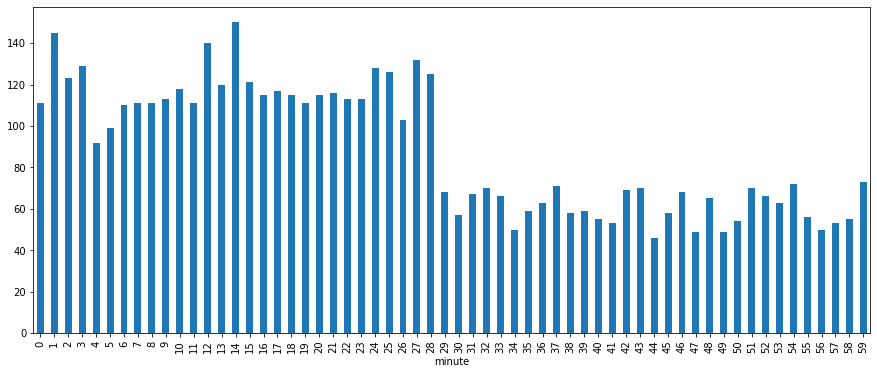

In [ ]:
min_trans.plot.bar(figsize=(15, 6))

In [ ]:
df_1.date.describe(datetime_is_numeric=True)

count                             5315
mean     2020-03-02 00:43:56.628974592
min                2020-03-02 00:00:00
25%         2020-03-02 00:21:50.500000
50%                2020-03-02 00:43:26
75%         2020-03-02 01:06:22.500000
max                2020-03-02 01:29:05
Name: date, dtype: object

Note: Извлекли минутную часть времени, а не число минут с начала дня.
График надо строить по другому

# Задание 7
Исправьте ошибку коллеги, и посчитайте число минут, прошедших с начала дня. Результат сохраните в колонку true_minute. Постройте график, как в предыдущем шаге, и посмотрите, произошли ли изменения (график в код включать не нужно).

In [ ]:
df_1['true_minute'] = df_1.date.dt.minute + df_1.date.dt.hour * 60

In [ ]:
df_1.head(3)

,date,name,transaction,minute,true_minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6,66


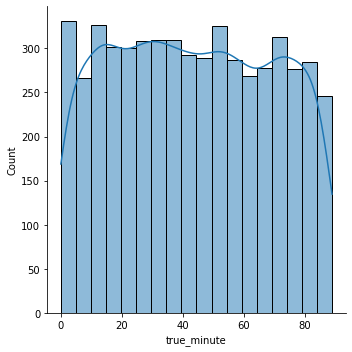

In [ ]:
sns.displot(data=df_1, x='true_minute', kde=True)